<a href="https://colab.research.google.com/github/gokulakrishnanbalaji/ProCode-Kaggle/blob/main/ProCode_ML_starter_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Competition website: [Kaggle competition link](https://www.kaggle.com/competitions/playground-series-s4e1/)

In [139]:
! wget -O train.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/train.csv
! wget -O test.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/test.csv
! wget -O sample_submission.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/sample_submission.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# Importing Libraries


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and analysis

In [141]:
# Load the dataset
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')


In [142]:
# Explore the first few rows
# train_data.head()
# test_data.head()
# train_data.info()
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [143]:
# Shape of df
train_data.shape

(165034, 14)

In [144]:
# check for null values
test_data.isna().any()

id                 False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

In [145]:
# Identify unwanted column and remove them in both train and test
train_data=train_data.drop(['id','CustomerId','Surname'],axis=1)
test_data=test_data.drop(['id','CustomerId','Surname'],axis=1)


In [146]:
# check for duplicates

train_data.duplicated().sum()
test_data.duplicated().sum()

72

In [147]:
# Drop the duplicates

train_data=train_data.drop_duplicates()

train_data.duplicated().sum()
test_data=train_data.drop_duplicates()

test_data.duplicated().sum()

0

In [148]:
# Separate numerical and categorical data
num_train_data=train_data.select_dtypes(include=np.number)
cat_train_data=train_data.select_dtypes(exclude=np.number)
num_test_data=test_data.select_dtypes(include=np.number)
cat_test_data=test_data.select_dtypes(exclude=np.number)
cat_test_data

,Geography,Gender
0,France,Male
1,France,Male
2,France,Male
3,France,Male
4,Spain,Male
...,...,...
165029,Spain,Female
165030,France,Male
165031,France,Male
165032,Spain,Female


<Axes: >

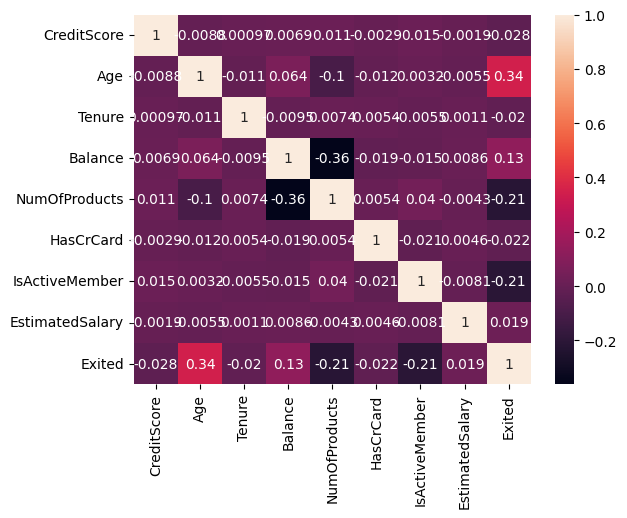

In [149]:
# check correlation among numerical data cols
# corr=num_train_data.corr()
# sns.heatmap(corr,annot=True)
corr=num_test_data.corr()
sns.heatmap(corr,annot=True)

# Data Preprocessing

In [150]:
# Label encode for categorical variable for train and test

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for columns in cat_train_data.columns:
    labelencoder.fit(train_data[columns])
    train_data[columns]=labelencoder.transform(train_data[columns])
    test_data[columns]=labelencoder.transform(test_data[columns])

train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Feature engineering

In [151]:
# Create new col called balance_per_salary
train_data['balance_per_salary']=train_data['Balance']/train_data['EstimatedSalary']
test_data['balance_per_salary']=test_data['Balance']/train_data['EstimatedSalary']
# train_data=train_data.drop(columns=['Balance','EstimatedSalary'])
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_per_salary
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.000000
165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.000000
165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.000000
165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,2.269582


In [152]:
# Scale features in both train and test data

from sklearn.preprocessing import MinMaxScaler
maxminscalar=MinMaxScaler()

for col in train_data.columns:
    if col!='Exited':
        maxminscalar.fit(train_data[[col]])
        train_data[col]=maxminscalar.transform(train_data[[col]])
        test_data[col] =maxminscalar.transform(test_data[[col]])

train_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_per_salary
0,0.636,0.0,1.0,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,0,0.000000
1,0.554,0.0,1.0,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,0,0.000000
2,0.656,0.0,1.0,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,0,0.000000
3,0.462,0.0,1.0,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,0,0.000137
4,0.732,1.0,1.0,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0,0.000000


# Model Selection

In [166]:
# split data as train and test

from sklearn.model_selection import train_test_split
y=train_data['Exited']
x=train_data.drop(columns=['Exited'])
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=72)
print(train_x.shape)
test_x.shape



(110490, 11)


(54421, 11)

In [167]:
# we will train with logistic regression and XGboost
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
ypred=logreg.predict(test_x)
ypred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [170]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.3/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.6/99.8 MB 5.1 MB/s eta 0:00:20
   ---------------------------------------- 1.2/99.8 MB 6.2 MB/s eta 0:00:17
    --------------------------------------- 2.1/99.8 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.2/99.8 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 3.6/99.8 MB 12.0 MB/s eta 0:00:09
   - -------------------------------------- 4.0/99.8 MB 11.6 MB/s eta 0:00:09
   - -------------------------------------- 4.0/99.8 MB 11.6 MB/s eta 0:00:09
   - -------------------------------------- 4.0/99.8 MB 11.6 MB/s eta 0:00:09
   - -------------------------------------- 4.3/99.8 MB 8.6 MB/s eta 0:00:12
   -- ------------------------------------- 6.5/99.8 MB 11.9 MB/s eta 0:00:08



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
# Use logistic regression

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(train_x,train_y)
xgb_ypred=xgb.predict(test_x)



In [156]:
# Use xgboost

#from xgboost import XGBClassifier



# Model Evaluation

In [172]:
# F1 score for logistic regression

from sklearn.metrics import f1_score
f1_score(test_y,ypred)


0.4580335731414869

In [173]:
# F1 score for XGBoost

from sklearn.metrics import f1_score
f1_score(test_y,xgb_ypred)


0.6377964354102224

# Hyperparameter Tuning

In [176]:
#Tweak the parameters n_estimators, max_depth ,learning_rate

from sklearn.model_selection import GridSearchCV
paramdict={'n_estimators':[100,200,500], 'max_depth':[2,5] ,'learning_rate':[0.1,0.01]}
gridsearch=GridSearchCV(estimator=xgb,param_grid=paramdict,cv=5)
gridsearch.fit(train_x,train_y)
xgb_gsv_ypred=gridsearch.predict(test_x)

In [177]:
# f1 score for the grid_search

f1_score(test_y,xgb_gsv_ypred)

0.6413054162980438

# Performance Report

In [179]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,xgb_gsv_ypred)



array([[40599,  2197],
       [ 5101,  6524]], dtype=int64)

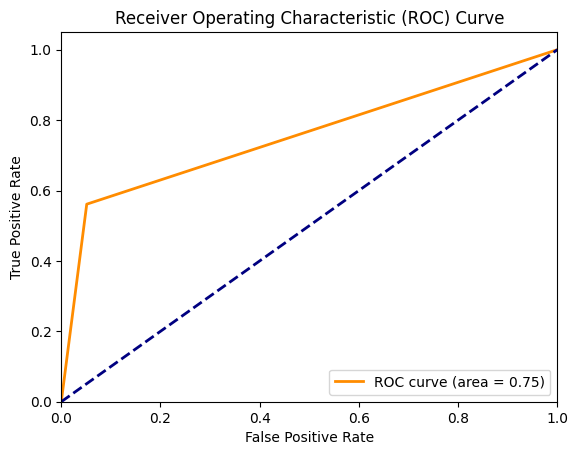

In [180]:
# ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, xgb_gsv_ypred)

# Compute Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show() 

# Submission

In [163]:
# make predictions using the latest model
y_pred=gridsearch.predict(test_data)
ypred


In [164]:
# make submission dataframe




In [165]:
# convert submission to csv

